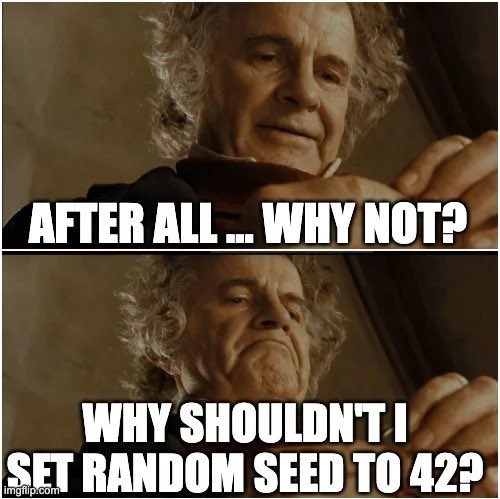

# Ejercicios semana 3 - Support Vector Machine (SVM)

El objetivo de los ejercicios de esta semana es explorar las capacidades de algunos SVM para clasificación.

## Hagamos lunas

Hagamos las mismas lunas que ya resolvieron en la práctica anterior (así podemos comparar resultados)

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=250, noise=0.3, random_state=42)

# separamos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



La idea es comparar las capacidades de algunas de las variantes que vimos de los SVM, en particular una versión con kernel polinomial y otra con kernel gaussiano (RBF). Para todos los ejercicios recuerden escalar los datos y, si se animan, usen un pipeline.

1. Entrenar un SVM con kernel polinomial**(kernel='poly'**) con los datos de entrenamiento, deje los hiperparámetros por default y reporten los resultados del accuracy con validación cruzada (promediando).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

#poly por default
model_poly = Pipeline([('scaler', StandardScaler()),
                      ('SVM_poly', SVC(kernel='poly'))
                    ])

model_poly.fit(X_train, y_train)

exactitud = cross_val_score(model_poly, X_train, y_train, cv=5, scoring='accuracy')
print(exactitud)
print(exactitud.mean())

[0.81578947 0.84210526 0.83783784 0.72972973 0.83783784]
0.8126600284495021


2. Entrenar un SVM con kernel polinomial **(kernel='poly'**) pero esta vez utilicen GridSearchCV o RandomizedSearchCV para buscar los mejores hiperparámetros. Recuerden que tienen el *C* (común a todos los SVM), el grado máximo del polinomio *degree* y el término independiente *coef0*. Reporten el accuracy del mejor modelo y los valores de sus hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV


model_poly = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='poly'))
                    ])


# empecé buscando algunos hiperparámetros genéricos y fui agregando para que los seleccionados no me queden en el borde
# Para poder usar el gridsearch con el pipeline, tienen que usar nombreestimador__parámetro para poder usar la grilla
svm_cv_poly = GridSearchCV(model_poly,
                      param_grid = {'svm__degree': [2, 3, 4, 5, 6], 'svm__C': [0.025, 0.05, 0.1, 1, 10, 12],'svm__coef0': [0, 1, 1.5, 2, 3]},
                      cv=5,
                      scoring='accuracy')


svm_cv_poly.fit(X_train, y_train)
print("Mejores hiperparámetros:", svm_cv_poly.best_params_)
print("Mejor Accuracy", svm_cv_poly.best_score_)

# Una opción interesante que encontré para no tener que scalear los datos todo el tiempo es meter el gridsearch dentro del pipeline, astuto...
# https://stackoverflow.com/questions/43366561/use-sklearns-gridsearchcv-with-a-pipeline-preprocessing-just-once

Mejores hiperparámetros: {'svm__C': 10, 'svm__coef0': 1, 'svm__degree': 3}
Mejor Accuracy 0.909103840682788


3. Repita el ejercicio 1, pero esta vez con un kernel Gaussiano **(kernel='rbf')**

In [ ]:
model_rbf = Pipeline([('scaler', StandardScaler()),
                      ('SVM_rbf', SVC(kernel='rbf'))
                    ])

model_rbf.fit(X_train, y_train)

exactitud = cross_val_score(model_rbf, X_train, y_train, cv=5, scoring='accuracy')
print(exactitud)
print(exactitud.mean())

[0.86842105 0.92105263 0.89189189 0.86486486 0.86486486]
0.8822190611664297


4. Repita el ejercicio 2, pero esta vez con un kernel Gaussiano **(kernel='rbf'**). Recuerden que los hiperparámetros de un RBF son, el *C* (obvio) y el *gamma*. Investiguen un poco en la documentación o con Google cuales serian valores razonables.

In [ ]:
model_rbf = Pipeline([('scaler', StandardScaler()),
                      ('svm', SVC(kernel='rbf'))
                    ])


svm_cv_rbf = GridSearchCV(estimator=model_rbf,
                      param_grid = {'svm__gamma': ['scale', 'auto', 0.01, 1, 3, 5, 7, 10], 'svm__C': [0.025, 0.05, 0.1, 1, 5]},
                      cv=5,
                      scoring='accuracy')


svm_cv_rbf.fit(X_train, y_train)
print("Mejores hiperparámetros:", svm_cv_rbf.best_params_)
print("Mejor Accuracy", svm_cv_rbf.best_score_)

#bueno, parece que va un poco mejor que el default
#podrian probar generar muchos valores en los parámetros con linspace a ver si mejora más

Mejores hiperparámetros: {'svm__C': 0.1, 'svm__gamma': 3}
Mejor Accuracy 0.909103840682788


5. Tienen los resultados de 4 modelos sobre el conjunto de entrenamiento. Elijan el que consideren mejor y reporten su accuracy sobre el conjunto de testeo. Este es el resultado final, el valor que reportan. Comparenlo con el resultado del bosque aleatorio de los ejercicios de la semana pasada y comenten con cual modelo se quedarían.


In [ ]:
from sklearn.metrics import accuracy_score

#Bueno, en este caso los mejores estimadores que pude encontrar dieron exactamente lo mismo
#voy a elegir el polinomial, simplemente porque es conceptualmente más sencillo y podría contar un poco mejor que hace
#reportemos cuando da en el conjunto de test

#sacamos el mejor estimador
mejor_svm = svm_cv_poly.best_estimator_

#predecimos cuanto da en el conjunto de testeo
y_test_pred = mejor_svm.predict(X_test)

#usamos la funcion de metrics para calcular el accuracy
exactitud = accuracy_score(y_test, y_test_pred)

print("Mejor Accuracy:", exactitud)


Mejor Accuracy: 0.8888888888888888


La idea era compararlo en igualdad de condiciones con el mejor random forest de la semana pasada (como si fuese una de las competencias que decíamos el lunes, por eso no usamos para nada el conjunto de test), así que viendo el resultado en test del notebook anterior que daba 0.8412698412698413 el SVM ganó esta vuelta, aunque no por mucho.

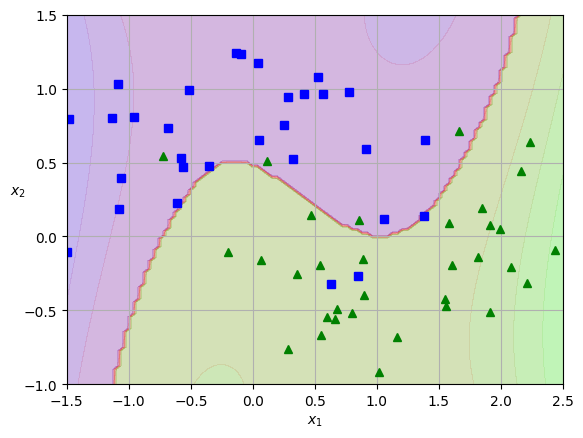

In [ ]:
'''
Solo porque podemos, usemos el código del notebook de la clase para visualizar la frontera de decisión y veamos como se comporta el mejor estimador en el conjunto de test
'''

import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(mejor_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5])

plt.show()

#Y si, viendo esos datos está claro porqué están peleados, probablemente sean lo máximo que pueden dar. Tampoco pueden hacer magia

#Resumen


*   Usamos los SVM principalmente para clasificar (se pueden usar para regresión también, miren el Géron). La principal característica es que buscan "la calle más ancha" entre los datos usando los puntos más cercanos entre si de cada clase.
*   Eso se hace con LinearSVC o SVC(kernel='linear'), el hiperparámetro "C" es el que pueden optimizar (si es chico permite más violaciones al margen, si es grande es más estricto).
*   A veces puede pasar que en "el espacio de características" (el espacio donde viven los datos) no se pueden separar las clases, pero si llevamos esos puntos a una dimensionalidad más alta se facilita.
*   Habia una una forma de hacerlo a mano (con polinomial features)
*   Sino teníamos dos "kernels" que lo hacian. Un kernel es una función que es la que hace la *magia* de trabajar en este espacio multidimensional sin realmente trabajar ahí. Vimos un kernel polinomial y uno que se llama RBF

